# Description

This jupyter notebook examines the Yes Bank campaign data. The data is in the form of csv file. This marketing campaign is in the form of **carousels** and **banners**, where each of them is named on the basis of the targeting parameters they cover.

Some of the performance parameters contained in the dataset are as follows-
1. Results
2. Reach
3. Impressions
4. Cost/Results
5. Amount Spent 
6. Relevance Score

The demographic parameters covered while targeting the customers are-
1. Age
2. Language
3. Occupation
4. Education

# Steps Involved

The flow of this project is as follows-
1. Examining the data, look for dirty data and clean it.
2. Visualising the data, and report patterns.
3. Check if the segementation is possible or not, if possible do it.

# Examining the data

## 1. Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

## 2. Importing the excel data

In [2]:
# Importing the data which is a csv file

data = pd.read_csv("C://Users//amanlp7//Downloads//Untitled-report-Sep-15-2018-Oct-11-2018.csv")

## 3. Number of rows and columns

In [3]:
# Number of rows
print("Number of rows = {0}".format(data.shape[0]))

# Number of columns
print("Number of columns = {0}".format(data.shape[1]))

Number of rows = 19264
Number of columns = 34


We see that there are 19,264 rows and 34 columns. Now we are going to how our data looks like.

In [4]:
# Head of the data
data.head()

,Campaign ID,Campaign name,Ad set ID,Ad set name,Ad ID,Ad name,Age,Gender,Delivery status,Delivery level,...,"Cost per 1,000 people reached","CPM (cost per 1,000 impressions)",Cost per unique link click,Cost per outbound click,Cost per unique click (all),Unique CTR (all),Unique clicks (all),Unique link clicks,Reporting starts,Reporting ends
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146.440992,47.705875,5.864373,4.752498,5.297344,2.764423,9246,8352.0,2018-09-15,2018-10-11
1,2.384294e+16,Yesbank_int-prof,All,All,All,All,All,All,inactive,campaign,...,134.675275,49.175297,6.212941,5.148600,5.565810,2.419689,5146,4610.0,2018-09-15,2018-10-11
2,2.384294e+16,Yesbank_int-prof,23842941639670506,s1#occ#doc-a#yth-loc#beng-rs#m-s2#int#otbnj,All,All,All,All,not_delivering,adset,...,111.588976,52.024112,4.099500,3.526452,3.813488,2.926165,86,80.0,2018-09-15,2018-10-11
3,2.384294e+16,Yesbank_int-prof,23842941639670506,s1#occ#doc-a#yth-loc#beng-rs#m-s2#int#otbnj,23842941641340506,s1#occ#doc-a#yth-loc#beng-rs#m-s2#int#otbnj,All,All,not_delivering,ad,...,111.588976,52.024112,4.099500,3.526452,3.813488,2.926165,86,80.0,2018-09-15,2018-10-11
4,2.384294e+16,Yesbank_int-prof,23842941639670506,s1#occ#doc-a#yth-loc#beng-rs#m-s2#int#otbnj,23842941641340506,s1#occ#doc-a#yth-loc#beng-rs#m-s2#int#otbnj,25-34,All,NaN,NaN,...,117.791134,58.391061,4.750909,3.919500,4.479429,2.629602,35,33.0,2018-09-15,2018-10-11


From the above table we see that there are both categorical and numerical features.

## 4. Statistical Description of the data

In [5]:
# Below is the statistical description of the data

data.describe()

,Campaign ID,Results,Reach,Impressions,Cost per result,Amount spent (INR),Relevance score,Link clicks,Website purchases,Result rate,...,CPC (all),CTR (all),"Cost per 1,000 people reached","CPM (cost per 1,000 impressions)",Cost per unique link click,Cost per outbound click,Cost per unique click (all),Unique CTR (all),Unique clicks (all),Unique link clicks
count,1.926300e+04,6513.000000,19264.000000,1.926400e+04,6513.000000,19264.000000,406.000000,6514.000000,0.0,6513.000000,...,6936.000000,8532.000000,19136.000000,19136.000000,6514.000000,6514.000000,6936.000000,8532.000000,19264.000000,6514.000000
mean,2.384294e+16,7.911869,174.327814,3.197753e+02,4.382047,15.255162,2.408867,9.492785,NaN,2.263508,...,4.349156,1.902954,77.918498,62.167429,4.648210,4.382104,4.564866,2.545579,3.095100,8.395302
std,1.164333e+09,90.929279,3015.782383,9.098803e+03,3.243357,434.524542,0.530846,156.675712,NaN,4.105930,...,3.352729,4.211804,50.984545,42.381048,3.387313,3.243111,3.468642,5.236391,82.007942,127.378631
min,2.384294e+16,1.000000,1.000000,1.000000e+00,0.010000,0.000000,1.000000,1.000000,NaN,0.134771,...,0.010000,0.000000,0.000000,0.000000,0.010000,0.010000,0.010000,0.000000,0.000000,1.000000
25%,2.384294e+16,1.000000,6.000000,7.000000e+00,2.310000,0.410000,2.000000,1.000000,NaN,0.897666,...,2.291250,0.598802,54.099650,39.549825,2.480000,2.310000,2.440000,0.821694,0.000000,1.000000
50%,2.384294e+16,2.000000,24.000000,3.000000e+01,3.776667,1.850000,2.000000,2.000000,NaN,1.315789,...,3.647083,1.144165,70.909463,54.760274,4.062500,3.778333,3.873309,1.612903,0.000000,2.000000
75%,2.384294e+16,7.000000,86.000000,1.120000e+02,5.500000,6.350000,3.000000,7.000000,NaN,2.205882,...,5.310000,1.960784,90.000000,75.000000,5.810682,5.499500,5.550000,2.666667,1.000000,6.000000
max,2.384295e+16,5563.000000,334464.000000,1.026692e+06,29.150000,48979.240000,4.000000,10306.000000,NaN,100.000000,...,30.276879,100.000000,1212.500000,1212.500000,29.940000,29.150000,30.276879,100.000000,9246.000000,8352.000000


## 5. Percentage of null values

Text(0.5, 1.0, '% Missing values')

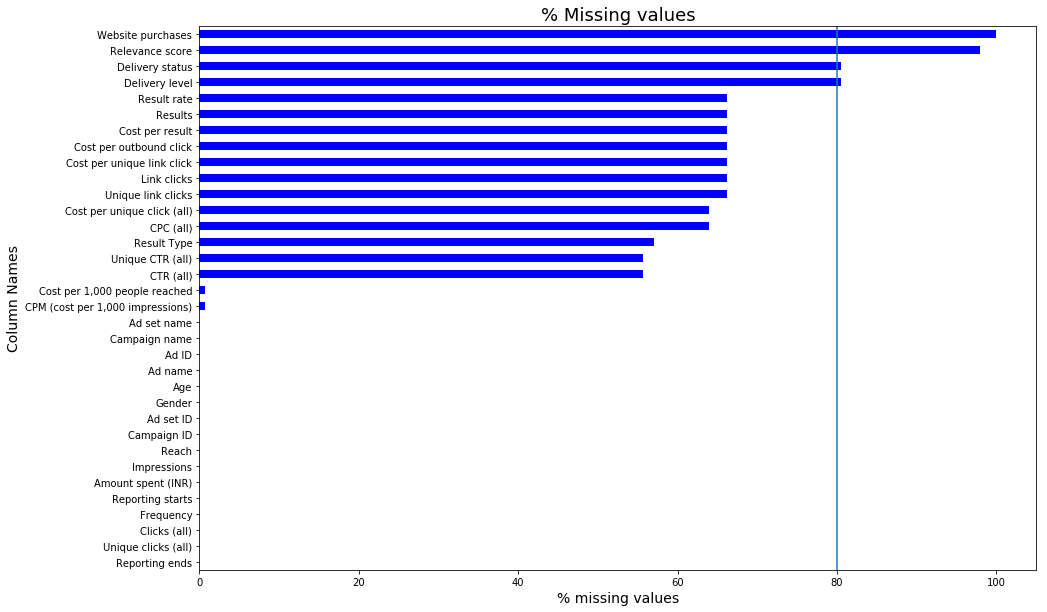

In [6]:
# Graph showing % of null values

plt.figure(figsize=(15,10))
missing_val_percentage = ((data.isnull().sum() / data.shape[0])*100).sort_values()
missing_val_percentage.plot(kind = "barh", color = "blue")
plt.axvline(x = 80)
plt.xlabel("% missing values", size = 14)
plt.ylabel("Column Names", size = 14)
plt.title("% Missing values", size = 18)

From the above plot we see that four columns have greater than 80% of missing values. These are -
1. Website purchases
2. Relevance score
3. Delivery status
4. Delivery level

These parameters are defined below -

1. Website purchases-
The total return on ads spend from website purchases.

2. Relevance Score-
A rating from 1 to 10 that estimates how well your target audience is responding to your ad. This score is shown after your ad receives more than 500 impressions. It's only visible when looking at reporting for ads and does not appear for ad sets and campaigns. This field is currently only visible at the ad level.

3. Delivery Status-
Status of the ad delivery.

4. Delivery Level-
Level of the delivery, if its a campaign, adset or single ad.

## 6. Categorical and Continous features

There are 11 categorical features, 2 features of type date, and rest are continous features.

# Exploratory Data Analysis

As we know we have 34 features in total, but only few of them are relevant, which are as follows-

1. Reach-
The number of people who saw your ads at least once. Reach is different from impressions, which may include multiple views of your ads by the same people.

2. Impressions-
The number of times the ads were on screen.

3. Unique Clicks-
The number of people who performed a click.

4. Unique click through rate-
The percentage of people who saw your ad and performed a unique click (all).

5. Gender-
Gender of the person.

6. Age-Group-
Age group to which a person belongs.

So now we'll do our exploratory data analysis considering only the above mentioned features.

## 1. Univariate Analysis

### 1.1. Reach

First we examine the columns ad name and Reach together.

In [7]:
# Printing out column adname and Reach

data[["Ad name", "Reach"]].head(n=10)

,Ad name,Reach
0,NaN,334464
1,All,212672
2,All,2939
3,s1#occ#doc-a#yth-loc#beng-rs#m-s2#int#otbnj,2939
4,s1#occ#doc-a#yth-loc#beng-rs#m-s2#int#otbnj,1331
5,s1#occ#doc-a#yth-loc#beng-rs#m-s2#int#otbnj,981
6,s1#occ#doc-a#yth-loc#beng-rs#m-s2#int#otbnj,348
7,s1#occ#doc-a#yth-loc#beng-rs#m-s2#int#otbnj,2
8,s1#occ#doc-a#yth-loc#beng-rs#m-s2#int#otbnj,1436
9,s1#occ#doc-a#yth-loc#beng-rs#m-s2#int#otbnj,1051


From the above table we see that, not all the rows in the column **Ad Name** has a represent a particular banner name. So we will take only those rows which have a value for Ad Name and which has a proper name.

In [8]:
# Cleaning the data for reach column

Reach  = data[["Ad name", "Reach"]].dropna()
Reach = Reach[Reach["Ad name"] != "All"]

C:\Users\amanlp7\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Density plot for Reach')

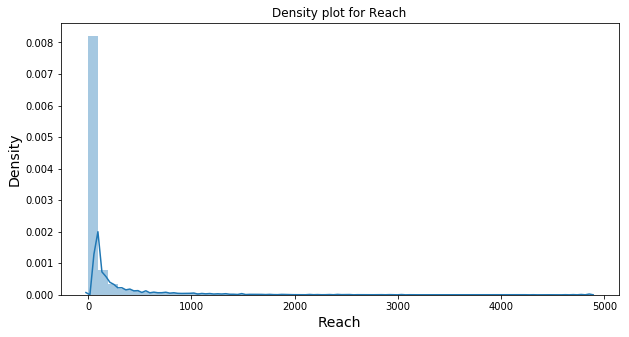

In [9]:
# Plotting the density plot for Reach

plt.figure(figsize=(10,5))
sns.distplot(Reach.Reach, kde = True)
'''plt.axvline(x = 21, color = "red")
plt.text(115.761732,0.005,"Mean = 115.761732", rotation = 270)'''
plt.xlabel("Reach", size = 14)
plt.ylabel("Density", size = 14)
plt.title("Density plot for Reach")  

From the above density plot we can clearly see that, the distribution is not normal. Its skewed towards right.

### 1.2. Impression

Text(0.5, 1.0, 'Density plot for Impressions')

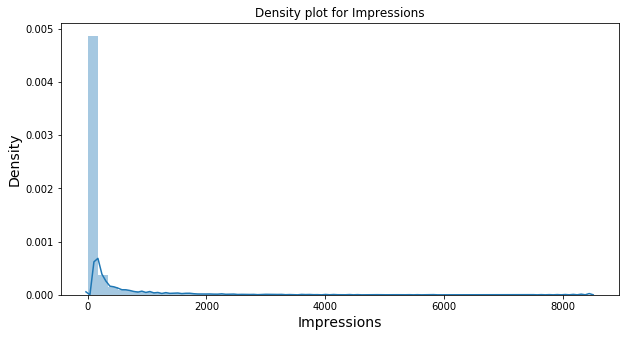

In [10]:
# Distribution of impression

Impressions = data[["Ad name", "Impressions"]].dropna()
Impressions = Impressions[Impressions["Ad name"] != "All"]

plt.figure(figsize=(10,5))
sns.distplot(Impressions.Impressions, kde = True)
plt.xlabel("Impressions", size = 14)
plt.ylabel("Density", size = 14)
plt.title("Density plot for Impressions")  

We see that the distribution for Impressions is positively skewed.

### 1.3. Unique Clicks

Text(0.5, 1.0, 'Density plot for Unique clicks')

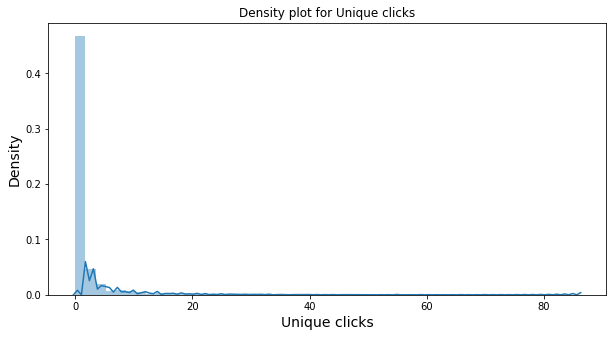

In [11]:
# Distribution of Unique Clicks

Unique_clicks = data[["Ad name", "Unique clicks (all)"]].dropna()
Unique_clicks = Unique_clicks[Unique_clicks["Ad name"] != "All"]

plt.figure(figsize=(10,5))
sns.distplot(Unique_clicks["Unique clicks (all)"], kde = True)
plt.xlabel("Unique clicks", size = 14)
plt.ylabel("Density", size = 14)
plt.title("Density plot for Unique clicks") 

We see that density plot for Unique Clicks is not normal, its skewed on the right, moreover it has two modes.

### 1.4. Unique CTR

Text(0.5, 1.0, 'Density plot for Unique CTR')

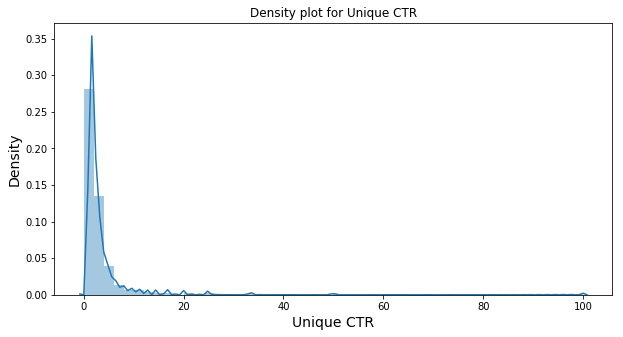

In [12]:
# Distribution of Unique CTR

Unique_CTR = data[["Ad name", "Unique CTR (all)"]].dropna()
Unique_CTR = Unique_CTR[Unique_CTR["Ad name"] != "All"]

plt.figure(figsize=(10,5))
sns.distplot(Unique_CTR["Unique CTR (all)"], kde = True)
plt.xlabel("Unique CTR", size = 14)
plt.ylabel("Density", size = 14)
plt.title("Density plot for Unique CTR") 

We see that Unique CTR has a sharp peak and after that it rapidly declines, the distribution is positively skewed.

### 1.5. Gender

We know that gender is a factor variable, so we are going to plot a barchart for it.

Text(0.5, 0, 'Number of ads targeted')

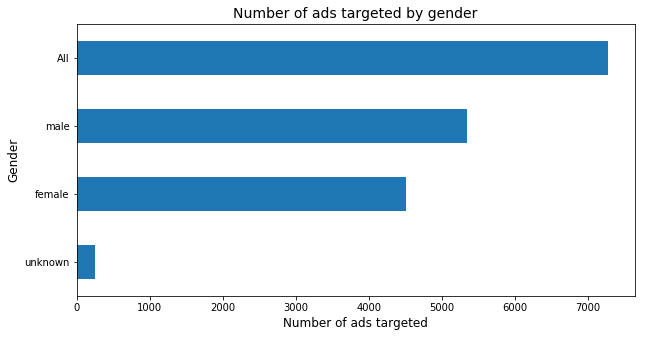

In [13]:
# Bar chart for Gender

Gender = data[["Ad name", "Gender"]].dropna()
Gender = Gender[Gender["Ad name"] != "All"]

(Gender.groupby("Gender").count().sort_values(by = "Ad name").
 plot(kind = "barh", legend = False,figsize=(10,5)))
plt.ylabel("Gender", size = 12)
plt.title("Number of ads targeted by gender", size = 14)
plt.xlabel("Number of ads targeted", size = 12)

### 1.6. Age-Group

Text(0.5, 0, 'Number of ads targeted')

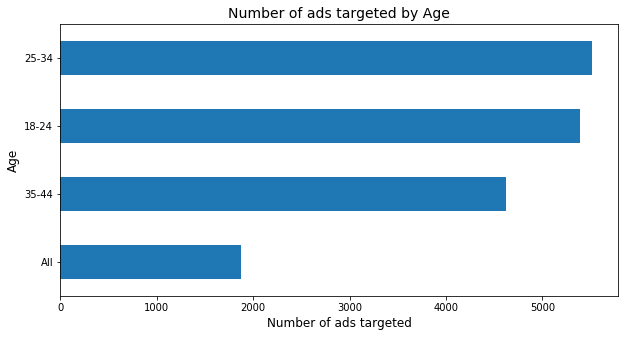

In [14]:
# Bar chart for age-group

Age_group = data[["Ad name", "Age"]].dropna()
Age_group = Age_group[Age_group["Ad name"] != "All"]

(Age_group.groupby("Age").count().sort_values(by = "Ad name").
 plot(kind = "barh", legend = False,figsize=(10,5)))
plt.ylabel("Age", size = 12)
plt.title("Number of ads targeted by Age", size = 14)
plt.xlabel("Number of ads targeted", size = 12)

From the above plot we can infer that most of the people who are targeted by this ad are in the age group of 18 to 34.

## 2. Multivariate Analysis

Now that we have done univaraiate analysis, we are going to do multivariate analysis to answer specific questions that we have. We will be dropping the rows with null values.

### 2.1. Median impressions by age group

Text(0.5, 0, 'Median Impressions')

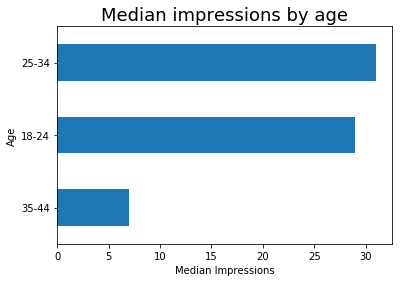

In [15]:
# Median impression by age

Impression_by_age = data[["Ad name", "Age", "Impressions"]].dropna()
Impression_by_age = (Impression_by_age[(
    Impression_by_age["Ad name"] != "All") & (Impression_by_age["Age"] != "All")])
Impression_by_age = Impression_by_age[["Age", "Impressions"]].groupby("Age").median()
Impression_by_age.sort_values("Impressions").plot(kind = "barh", legend = False)
plt.title("Median impressions by age", size = 18) 
plt.xlabel("Median Impressions")

### 2.2. Median impressions by gender

Text(0.5, 0, 'Median Impressions')

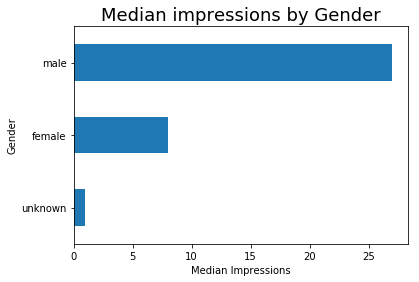

In [16]:
# Median impression by gender

Impression_by_gender = data[["Ad name", "Gender", "Impressions"]].dropna()
Impression_by_gender = (Impression_by_gender[(
    Impression_by_gender["Ad name"] != "All") & (Impression_by_gender["Gender"] != "All")])
Impression_by_gender = Impression_by_gender[["Gender", "Impressions"]].groupby("Gender").median()
Impression_by_gender.sort_values("Impressions").plot(kind = "barh", legend = False)
plt.title("Median impressions by Gender", size = 18) 
plt.xlabel("Median Impressions")

From the above plot we see that median impression for males is significantly higher than that in females, which suggests that most of the ads were targeted towards males than females, also that may be because of the skewed sex ratio.

### 2.3. Median impressions by age group and gender

In [17]:
# Median impression by age faceted by gender

Impressions_by_age_gender = data[["Ad name", "Age", "Impressions", "Gender"]].dropna()
Impressions_by_age_gender = (Impressions_by_age_gender[((
    Impressions_by_age_gender["Ad name"] != "All") & 
    (Impressions_by_age_gender["Age"] != "All") & 
    (Impressions_by_age_gender["Gender"] != "unknown"))])
Impressions_by_age_gender = Impressions_by_age_gender.groupby(["Gender", "Age"]).median()
Impressions_by_age_gender.reset_index(inplace=True)

Text(-0.6, 1.0, 'Median impressions by age and gender')

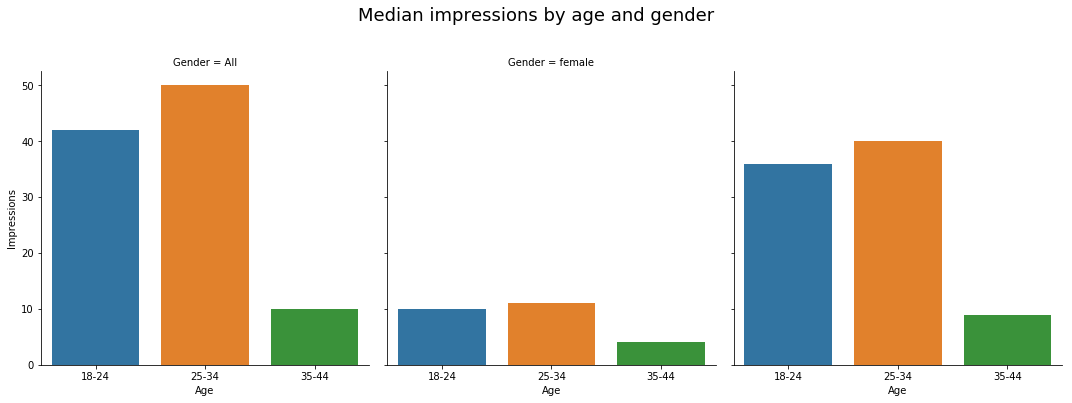

In [18]:
# Bar chart showing median impressions for all age groups faceted by gender

sns.catplot(x = "Age", y = "Impressions", col = "Gender", data = Impressions_by_age_gender,
           kind = "bar") 
plt.title("Median impressions by age and gender", size = 18, x = -0.6, pad = 50.5) 

Here we have ignored the ads which are trageted towards the **unknown** gender, as median impressions for these, for all the age groups is 1.

From the above plot we see that for all the both males and females, the median impressions is highest for the age group **25-34**, followed by **18-34**, while the median impression is least for the age group of **35-44**. For the aggregated data we see that the same trend continues.

### 2.4. Median unique CTR by age group

Text(0.5, 0, 'Median Unique CTR ')

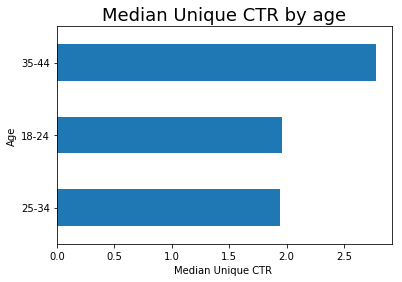

In [19]:
# Median unique CTR by age group

unique_CTR_age = data[["Ad name", "Age", "Unique CTR (all)"]].dropna()
unique_CTR_age = (unique_CTR_age[(
    unique_CTR_age["Ad name"] != "All") & (unique_CTR_age["Age"] != "All")])
unique_CTR_age = unique_CTR_age[["Age", "Unique CTR (all)"]].groupby("Age").median()
unique_CTR_age.sort_values("Unique CTR (all)").plot(kind = "barh", legend = False)
plt.title("Median Unique CTR by age", size = 18) 
plt.xlabel("Median Unique CTR ")

From the above bar chart we see that median unique click through rate is highest for the age group **35-44**, and almost same for the age groups **18-24** and **25-34**.

### 2.5. Median unique CTR by gender

Text(0.5, 0, 'Median Unique CTR ')

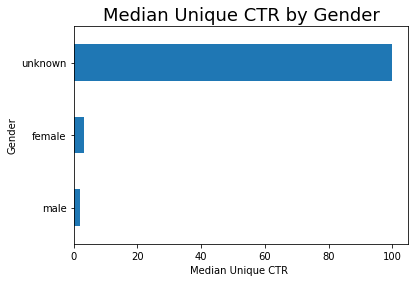

In [20]:
# median unique CTR by gender

unique_CTR_Gender = data[["Ad name", "Gender", "Unique CTR (all)"]].dropna()
unique_CTR_Gender = (unique_CTR_Gender[(
    unique_CTR_Gender["Ad name"] != "All") & (unique_CTR_Gender["Gender"] != "All")])
unique_CTR_Gender = unique_CTR_Gender[["Gender", "Unique CTR (all)"]].groupby("Gender").median()
unique_CTR_Gender.sort_values("Unique CTR (all)").plot(kind = "barh", legend = False)
plt.title("Median Unique CTR by Gender", size = 18) 
plt.xlabel("Median Unique CTR ")

From the above plot we see that the median unique click through rate is highest for the unknown gender category, which suggests that proportion of people out of total people who actually visit a website, choose to not specify their gender, or they may not be provided with that option, during form filling. We can further examine the data for the people who have mentioned their gender as unknown.

In [21]:
# Examining the unique CTR data for the people who have mentioned their
# gender as unknown

unique_CTR_Gender = data[["Ad name", "Gender", "Unique CTR (all)"]].dropna()
unique_CTR_Gender = (unique_CTR_Gender[(
    unique_CTR_Gender["Ad name"] != "All") & (unique_CTR_Gender["Gender"] != "All")])
unique_CTR_Gender[unique_CTR_Gender["Gender"] == "unknown"]

,Ad name,Gender,Unique CTR (all)
227,s1#occ#doc-a#yth-loc#deh-rs#m-s2#int#spwrst,unknown,100.0
13421,s1#occ#mana-g#m-a#yth-loc#mum-rs#s-g#m-s2#int#...,unknown,25.0
16357,s1#occ#tch-g#m-a#yth-loc#vskpt-rs#s-g#m-s2#int...,unknown,100.0


From the above table we see that there are only three rows where gender has been specified as unknown, and their unique click through rate is very high, so they can be considered as outliers, and can be omitted for future analysis.

### 2.6. Median unique CTR by age and gender

In [22]:
# Median unique CTR by age and gender

unique_CTR_by_age_gender = data[["Ad name", "Age", "Unique CTR (all)", "Gender"]].dropna()
unique_CTR_by_age_gender = (unique_CTR_by_age_gender[((
    unique_CTR_by_age_gender["Ad name"] != "All") & 
    (unique_CTR_by_age_gender["Age"] != "All") & 
    (unique_CTR_by_age_gender["Gender"] != "unknown"))])
unique_CTR_by_age_gender = unique_CTR_by_age_gender.groupby(["Gender", "Age"]).median()
unique_CTR_by_age_gender.reset_index(inplace=True)

Text(0.5, 1.2, 'Median Unique CTR by age and gender')

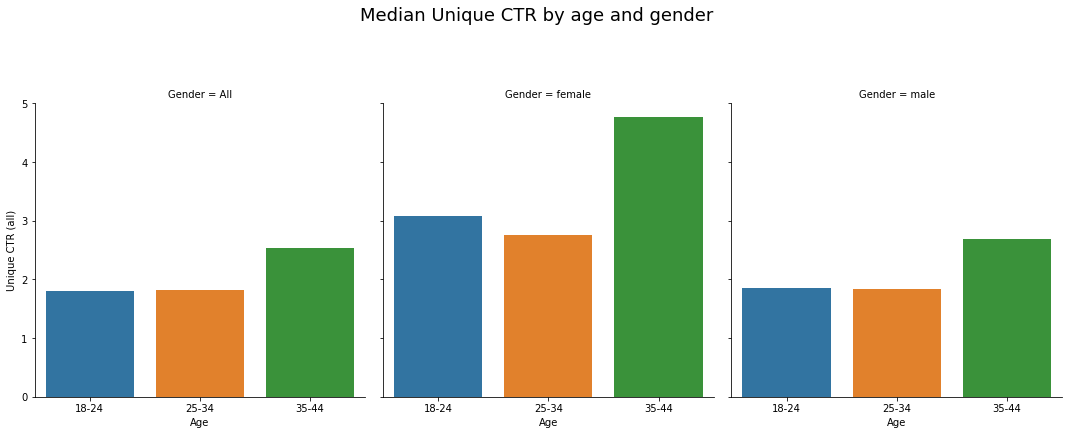

In [23]:
# Bar chart showing median unique CTR for all age groups faceted by gender

sns.catplot(x = "Age", y = "Unique CTR (all)", col = "Gender", data = unique_CTR_by_age_gender,
           kind = "bar") 
plt.suptitle("Median Unique CTR by age and gender", size = 18, x = 0.5, y= 1.2) 

From the above plot we see that for all the genders median click through rate is highest for the age group of **35-44**.

### 2.7. Median reach by age

Text(0.5, 0, 'Median Reach')

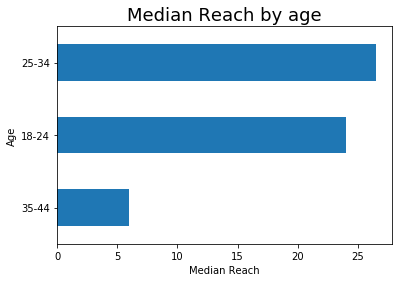

In [24]:
# Median reach by age

Reach_by_age = data[["Ad name", "Age", "Reach"]].dropna()
Reach_by_age = (Reach_by_age[(
    Reach_by_age["Ad name"] != "All") & (Reach_by_age["Age"] != "All")])
Reach_by_age = Reach_by_age[["Age", "Reach"]].groupby("Age").median()
Reach_by_age.sort_values("Reach").plot(kind = "barh", legend = False)
plt.title("Median Reach by age", size = 18) 
plt.xlabel("Median Reach")

From the above plot we see that median reach by age is highest for the age group of **25-34**, and lowest for the age group of **35-44**.

### 2.8. Median reach by gender

Text(0.5, 0, 'Median Reach')

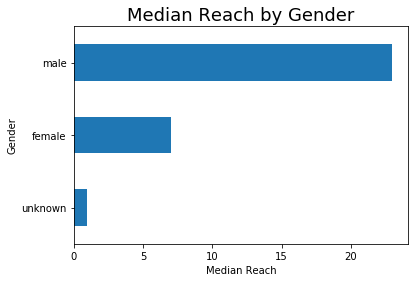

In [25]:
# Median reach by gender

Reach_by_Gender = data[["Ad name", "Gender", "Reach"]].dropna()
Reach_by_Gender = (Reach_by_Gender[(
    Reach_by_Gender["Ad name"] != "All") & (Reach_by_Gender["Gender"] != "All")])
Reach_by_Gender = Reach_by_Gender[["Gender", "Reach"]].groupby("Gender").median()
Reach_by_Gender.sort_values("Reach").plot(kind = "barh", legend = False)
plt.title("Median Reach by Gender", size = 18) 
plt.xlabel("Median Reach")

From the above plot we see that the median reach by gender in males is almost double than that in females.

### 2.9. Median reach by age and gender

In [26]:
# Median reach by age and gender

Reach_by_age_gender = data[["Ad name", "Age", "Reach", "Gender"]].dropna()
Reach_by_age_gender = (Reach_by_age_gender[((
    Reach_by_age_gender["Ad name"] != "All") & 
    (Reach_by_age_gender["Age"] != "All") & 
    (Reach_by_age_gender["Gender"] != "unknown"))])
Reach_by_age_gender = Reach_by_age_gender.groupby(["Gender", "Age"]).median()
Reach_by_age_gender.reset_index(inplace=True)

Text(0.5, 1.2, 'Median Reach by age and gender')

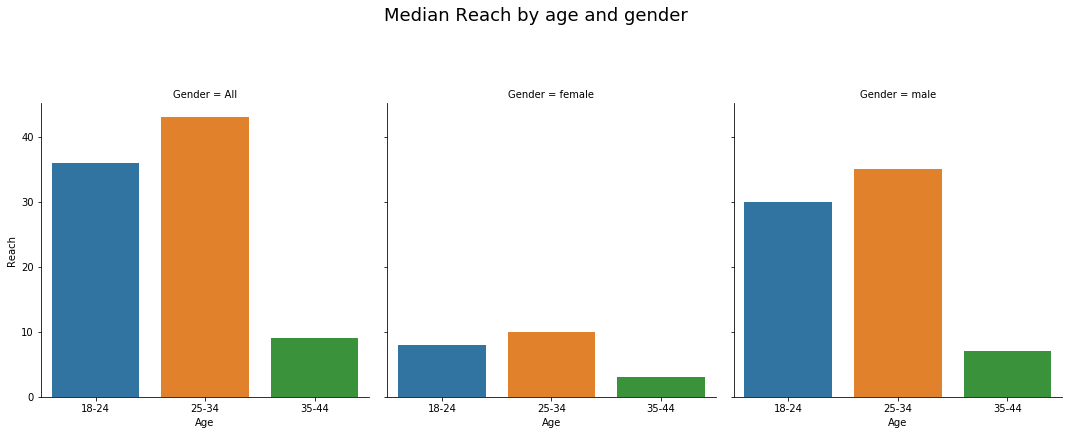

In [27]:
# Bar chart showing median reach for all age groups faceted by gender

sns.catplot(x = "Age", y = "Reach", col = "Gender", data = Reach_by_age_gender,
           kind = "bar") 
plt.suptitle("Median Reach by age and gender", size = 18, x = 0.5, y= 1.2) 

From the above plot we see that for both the genders we have maximum median reach in the age group of **25-34**, and minimum for the age group of **35-44**.

### 2.10. Mean unique clicks by age

For unique clicks we will be considering mean for each group as the median value is 0.

Text(0.5, 0, 'Mean Unique clicks')

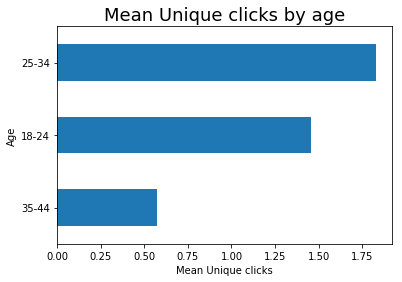

In [28]:
# Mean unique clicks by age

Unique_clicks_by_age = data[["Ad name", "Age", "Unique clicks (all)"]].dropna()
Unique_clicks_by_age = (Unique_clicks_by_age[(
    Unique_clicks_by_age["Ad name"] != "All") & (Unique_clicks_by_age["Age"] != "All")])
Unique_clicks_by_age = Unique_clicks_by_age[["Age", "Unique clicks (all)"]].groupby("Age").mean()
Unique_clicks_by_age.sort_values("Unique clicks (all)").plot(kind = "barh", legend = False)
plt.title("Mean Unique clicks by age", size = 18) 
plt.xlabel("Mean Unique clicks")

From the above plot we see that the mean number of unique clicks is highest for the age group of **25-34** and lowest for **35-44**.

### 2.11. Mean unique clicks by gender

Text(0.5, 0, 'Mean Unique clicks')

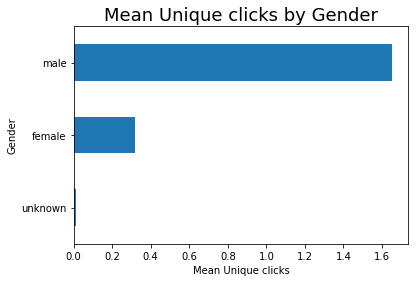

In [29]:
# Mean unique clicks by gender

Unique_clicks_by_gender = data[["Ad name", "Gender", "Unique clicks (all)"]].dropna()
Unique_clicks_by_gender = (Unique_clicks_by_gender[(
    Unique_clicks_by_gender["Ad name"] != "All") & (Unique_clicks_by_gender["Gender"] != "All")])
Unique_clicks_by_gender = Unique_clicks_by_gender[["Gender", "Unique clicks (all)"]].groupby("Gender").mean()
Unique_clicks_by_gender.sort_values("Unique clicks (all)").plot(kind = "barh", legend = False)
plt.title("Mean Unique clicks by Gender", size = 18) 
plt.xlabel("Mean Unique clicks")

From the above plot we see that mean unique clicks is more than than double in males than in females, and almost 0 for people who have not mentioned their gender, so we will discard the people in unknown category for future analysis.

### 2.12. Mean unique clicks by age and gender

In [30]:
# Mean unique clicks by age and gender

Unique_clicks_by_age_gender = data[["Ad name", "Age", "Unique clicks (all)", "Gender"]].dropna()
Unique_clicks_by_age_gender = (Unique_clicks_by_age_gender[((
    Unique_clicks_by_age_gender["Ad name"] != "All") & 
    (Unique_clicks_by_age_gender["Age"] != "All") & 
    (Unique_clicks_by_age_gender["Gender"] != "unknown"))])
Unique_clicks_by_age_gender = Unique_clicks_by_age_gender.groupby(["Gender", "Age"]).mean()
Unique_clicks_by_age_gender.reset_index(inplace=True)

Text(0.5, 1.2, 'Mean unique clicks by age and gender')

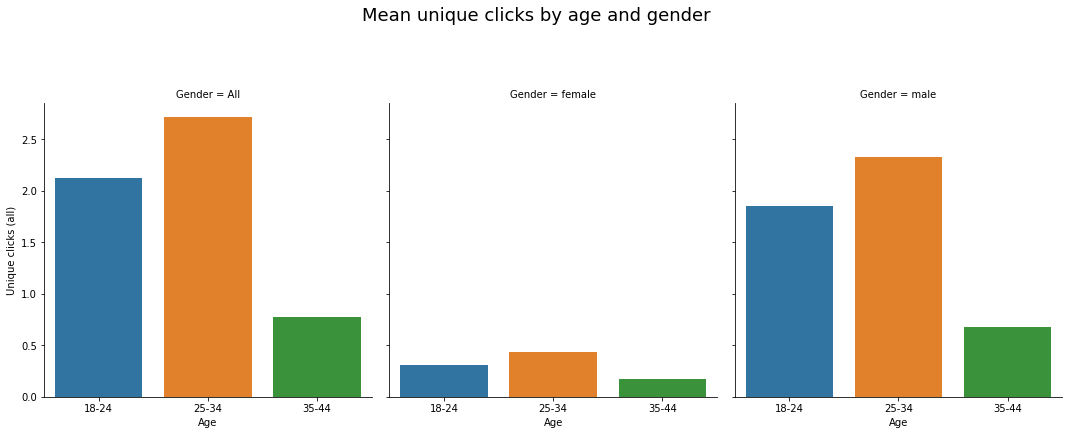

In [31]:
# Bar chart showing mean unique clicks for all age groups faceted by gender

sns.catplot(x = "Age", y = "Unique clicks (all)", col = "Gender", data = Unique_clicks_by_age_gender,
           kind = "bar") 
plt.suptitle("Mean unique clicks by age and gender", size = 18, x = 0.5, y= 1.2) 

From the above plot we infer that the mean unique clicks is highest for the age group of **25-34**, and lowest for the age group of **35-44** for both males and females.

# Clustering

For clustering we will only take the following features into consideration-

1. Reach
2. Impressions
3. Unique CTR
4. unique Clicks
5. Age-Group
6. Gender

## 1. Preparing data for clustering

First we need to prepare data for clustering. As we know that age group and gender are categorical variables, so first we need to dummify them, also we may need to standardise the numerical features if required. Also we know that **unique CTR** has nearly 60% missing values so we are going to discard it.

In [32]:
# Choosing the relevant features
clustering_data = data[["Reach", "Age", "Gender", "Impressions",
                        "Unique clicks (all)"]].dropna()

# Discarding rows having one of the following values
# "All" for column Ad name
# "All" for column Age
# "unknown" for column Gender
clustering_data = clustering_data[((clustering_data["Age"] != "All") &
                                  (clustering_data["Gender"] != "unknown"))]

clustering_data.head(n = 10)

,Reach,Age,Gender,Impressions,Unique clicks (all)
4,1331,25-34,All,2685,35
5,981,25-34,male,1951,22
6,348,25-34,female,732,13
8,1436,18-24,All,3214,46
9,1051,18-24,male,2299,34
10,385,18-24,female,915,12
11,172,35-44,All,405,5
12,133,35-44,male,304,2
13,39,35-44,female,101,3
16,1524,25-34,All,3379,30


In [33]:
# Dummified data
dummified_data = pd.get_dummies(clustering_data[["Age", "Gender"]])

# Concatenating the data with the original data
clustering_data = pd.concat([clustering_data[["Reach", 
                                             "Impressions", 
                                             "Unique clicks (all)"]],
                           dummified_data], axis = 1)

Now that we have dummified the data, we look at the features, Reach, Unique clicks and impressions, are continous numerical features and have different scales. We can use either **Standardisation** or **Normalization** to scale them. We choose **Standardisation** as it does not suppresse the outliers.

In [34]:
# Standardising the continous features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(clustering_data[["Reach", "Impressions", "Unique clicks (all)"]])
transformed_data = scaler.transform(clustering_data[["Reach", 
                                                     "Impressions", 
                                                     "Unique clicks (all)"]])
clustering_data[["Reach", "Impressions", "Unique clicks (all)"]] = transformed_data

C:\Users\amanlp7\Miniconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


We need to choose the optimal number of clusters for our clustering, we can use elbow method for that, initially we choose number of clusters from 2 to 8, and see the result, based on that we can increase or decrease the number of clusters.

In [35]:
# Implementing kmeans clustering

from scipy.spatial.distance import cdist

# Choosing clusters from 2 to 25
clusters = [x for x in range(2,26)]
distances = []

# Performing k means clustering with number of clusters
# ranging from 2 to 25
for k in clusters:
    
    model = KMeans(n_clusters=k)
    model.fit(clustering_data)
    distances.append(sum(np.min(cdist(clustering_data, model.cluster_centers_), 
                                axis = 1)) / clustering_data.shape[0])

([<matplotlib.axis.XTick at 0x623e825f98>,
 <a list of 13 Text xticklabel objects>)

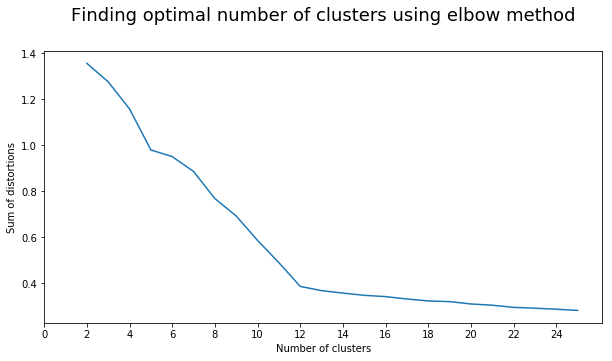

In [36]:
# Plotting the elbow curve to get optimal
# number of clusters

plt.figure(figsize=(10,5))
sns.lineplot(x = clusters, y = distances) 
plt.xlabel("Number of clusters")
plt.ylabel("Sum of distortions")
plt.title("Finding optimal number of clusters using elbow method", size = 18, pad = 30.5)
plt.xticks(np.arange(0, 25, step=2))

From the above plot we see that the decrease in distortion plateaus when the number of clusters becomes greater than 12, so 12 is the optimal number of clusters, also we can take any number of clusters based on our requirement.